In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme()

penguins = sns.load_dataset("penguins")

X = penguins[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]].to_numpy()
X = X[~np.isnan(X).any(axis=1)] # removing rows with NaN's
y = penguins.species.to_numpy()
y = np.delete(y, (3, 339))


In [15]:
A = X - X.mean(axis = 0)

U, sigma, Vt = np.linalg.svd(A, full_matrices=False)

print(f"np.shape(U) = {np.shape(U)}")
print(f"np.shape(sigma) = {np.shape(sigma)}")
print(f"np.shape(Vt) = {np.shape(Vt)} \n")

X = X[~np.isnan(X).any(axis=1)] # removing rows with NaN's

np.shape(U) = (342, 4)
np.shape(sigma) = (4,)
np.shape(Vt) = (4, 4) 



In [16]:
sigma_mat = np.diag(sigma)
print(f"A == U * sigma_mat * Vt: {np.allclose(A, np.dot(U, np.dot(sigma_mat, Vt)))} \n")

A == U * sigma_mat * Vt: True 



In [17]:
PC1 = Vt.T[:, 0]
PC2 = Vt.T[:, 1]
PC3 = Vt.T[:, 2]
PC4 = Vt.T[:, 3]

W2 = Vt.T[:, :2]
X2D = A.dot(W2)

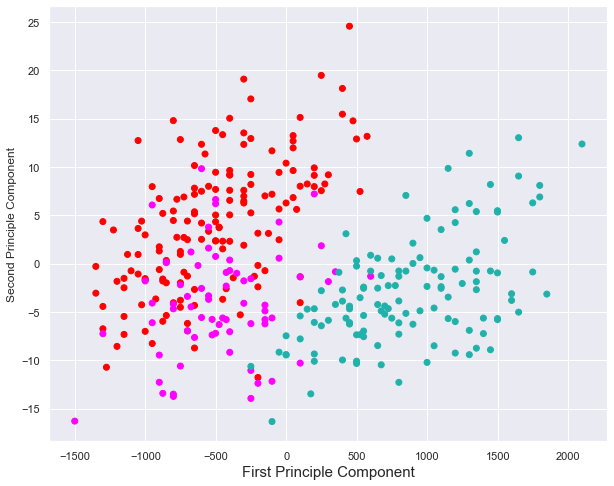

In [20]:
def colors(y):
    if y == "Adelie":
        return "red"
    elif y == "Chinstrap":
        return "magenta"
    else:
        return "lightseagreen"

c = [colors(label) for label in y]

plt.figure(figsize = (10, 8))
plt.scatter(X2D[:, 0], X2D[:, 1], c = c)
plt.xlabel("First Principle Component", fontsize = 15)
plt.ylabel("Second Principle Component")
plt.show()

In [21]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

scaled_X = preprocessing.scale(X)
pca = PCA()
pca.fit(scaled_X)

print(f"pca.explained_variance_ratio_ = {pca.explained_variance_ratio_}")

per_var = np.round(pca.explained_variance_ratio_*100, 2)
print(f"per_var = {per_var} \n")

pca.explained_variance_ratio_ = [0.68843878 0.19312919 0.09130898 0.02712305]
per_var = [68.84 19.31  9.13  2.71] 



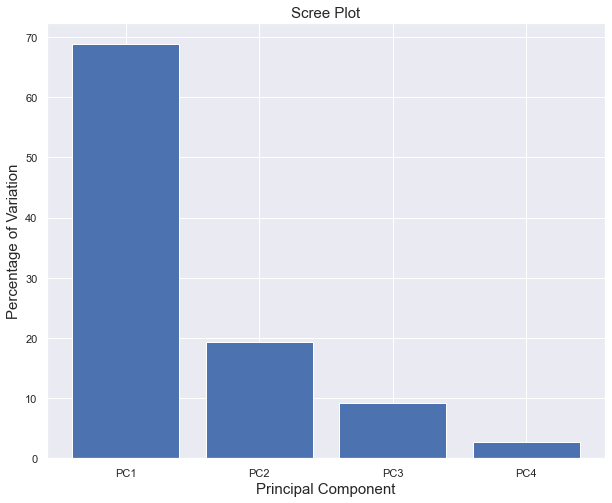

In [22]:
# Create a bar chart for the above array
# This chart is called a "Scree Plot"

labels = [f"PC{i}" for i in range(1,5)]

plt.figure(figsize = (10, 8))
plt.bar(x = range(1, 5), height = per_var, tick_label = labels)
plt.xlabel('Principal Component', fontsize = 15)
plt.ylabel('Percentage of Variation', fontsize = 15)
plt.title('Scree Plot', fontsize = 15)
plt.show()

In [27]:
# we call function pca.components_ to see how each PC is obtained
# as a linear combination of the original coordinates

# for example, here PC1 = 0.522 * sepal_length + 0.372 * sepal_width - 0.721 * petal_length - 0.262 * petal_width

features = list(set(penguins.columns) - {"species", "island", "sex"})
pd.DataFrame(data = pca.components_, columns = labels, index = features)

PC1       PC2       PC3       PC4
flipper_length_mm  0.455250 -0.400335  0.576013  0.548350
bill_length_mm     0.597031  0.797767  0.002282  0.084363
body_mass_g        0.644301 -0.418427 -0.232084 -0.596600
bill_depth_mm      0.145523 -0.167986 -0.783799  0.579882

In [28]:
# we use pca.transform to see how our data looks like in the new coordinate system

# this will be used later to plot our data in the first two coordinates PC1, PC2

pca_data = pca.transform(scaled_X)

pca_df = pd.DataFrame(pca_data, columns = labels)

pca_df

PC1       PC2       PC3       PC4
0   -1.843445  0.047702 -0.232794  0.523903
1   -1.306762 -0.428348 -0.029562  0.402426
2   -1.369181 -0.154476  0.198672 -0.528007
3   -1.878827 -0.002048 -0.618596 -0.478378
4   -1.911748  0.829210 -0.686584 -0.207428
..        ...       ...       ...       ...
337  2.006436 -0.958909  0.364630  0.174829
338  1.840886 -0.767714  0.229386  0.002905
339  2.760742  0.288886 -0.428439  0.240717
340  1.722364 -0.704269 -0.276979  0.338516
341  2.028902  0.357620 -0.162893  0.442237

[342 rows x 4 columns]

In [36]:
# we add to the previous table the labels for each flower

projected_df = pd.concat([pca_df, iris.species], axis = 1)
projected_df = projected_df.drop(labels=[342, 343], axis=0)
projected_df

PC1       PC2       PC3       PC4 species
0   -1.843445  0.047702 -0.232794  0.523903  Adelie
1   -1.306762 -0.428348 -0.029562  0.402426  Adelie
2   -1.369181 -0.154476  0.198672 -0.528007  Adelie
3   -1.878827 -0.002048 -0.618596 -0.478378  Adelie
4   -1.911748  0.829210 -0.686584 -0.207428  Adelie
..        ...       ...       ...       ...     ...
337  2.006436 -0.958909  0.364630  0.174829  Gentoo
338  1.840886 -0.767714  0.229386  0.002905  Gentoo
339  2.760742  0.288886 -0.428439  0.240717  Gentoo
340  1.722364 -0.704269 -0.276979  0.338516  Gentoo
341  2.028902  0.357620 -0.162893  0.442237  Gentoo

[342 rows x 5 columns]

In [37]:
projected_df["color"] = c
projected_df

PC1       PC2       PC3       PC4 species          color
0   -1.843445  0.047702 -0.232794  0.523903  Adelie            red
1   -1.306762 -0.428348 -0.029562  0.402426  Adelie            red
2   -1.369181 -0.154476  0.198672 -0.528007  Adelie            red
3   -1.878827 -0.002048 -0.618596 -0.478378  Adelie            red
4   -1.911748  0.829210 -0.686584 -0.207428  Adelie            red
..        ...       ...       ...       ...     ...            ...
337  2.006436 -0.958909  0.364630  0.174829  Gentoo  lightseagreen
338  1.840886 -0.767714  0.229386  0.002905  Gentoo  lightseagreen
339  2.760742  0.288886 -0.428439  0.240717  Gentoo  lightseagreen
340  1.722364 -0.704269 -0.276979  0.338516  Gentoo  lightseagreen
341  2.028902  0.357620 -0.162893  0.442237  Gentoo  lightseagreen

[342 rows x 6 columns]

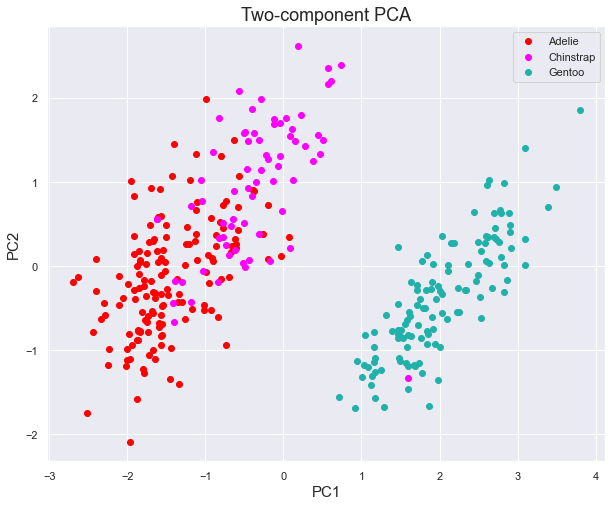

In [38]:
targets = ["Adelie", "Chinstrap", "Gentoo"]
colors = ["red", "magenta", "lightseagreen"]

plt.figure(figsize = (10, 8))

for target, color in zip(targets, colors):
    temp_df = projected_df[projected_df['species'] == target]
    plt.scatter(temp_df["PC1"],
                temp_df["PC2"],
                c = color)
    
plt.xlabel('PC1', fontsize = 15)
plt.ylabel('PC2', fontsize = 15)
plt.title('Two-component PCA', fontsize = 18)
plt.legend(targets)
plt.show()